In [1]:
import numpy as np
import pandas as pd
from astropy.table import Table, vstack
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from glob import glob
from astropy.timeseries import LombScargle
from scipy import stats
import warnings
from TESStools import *

In [2]:
massive_observed = pd.read_csv('../data/massive_observed.csv')
wrs = massive_observed[massive_observed['SpT']=='WR'].reset_index(drop=True)
wrs

,TIC ID,RA,Dec,dist,pmRA,pmDec,Tmag,ContRatio,SpT,CommonName,MKType,SimbadOType,SimbadSpT
0,340411624,253.743770,-41.150859,0.058194,-0.325187,-1.68914,4.4314,NaN,WR,HD 152408,Oep,BlueSG*,O8Iape
1,458559498,160.322981,-59.676916,0.034738,-7.321310,3.09122,4.4428,NaN,WR,HD 92740,WN 7 A,WR*,WN7h+O9III-V
2,390670978,160.967740,-60.117782,0.094213,-6.648830,1.59255,4.7143,NaN,WR,HD 93131,WN7 .,WR*,WN6ha-w
3,441173738,197.029803,-65.306022,0.049563,-4.100800,-1.64939,5.7402,NaN,WR,* tet Mus,B 0 IA+WC5.,WR*,WC5+B0III
4,458856322,161.043287,-59.719752,0.106334,-6.813200,2.72139,5.9901,NaN,WR,HD 93162,Oc,WR*,O2.5If*/WN6+OB
5,78959225,103.554350,-23.928339,0.113696,-4.431440,2.88440,6.5915,NaN,WR,HD 50896,Ob,WR*,WN4b
6,466582212,166.571680,-65.509788,0.056082,-2.213480,-1.98697,7.2818,NaN,WR,HD 96548,WN8 .,WR*,WN8h
7,12672792,304.885096,38.731655,0.054726,-2.342700,-3.67036,7.3776,NaN,WR,HD 193576,Ob,WR*,WN5+O6II-V
8,247347473,253.776875,-44.989257,0.074537,-0.259414,-4.08866,7.4719,NaN,WR,HD 152386,Oe,BlueSG*,O6:Iafpe
9,416028609,339.224812,56.905829,0.043681,-3.486610,-2.90792,8.3572,NaN,WR,HD 214419,WN 7 A,deltaCep,WN6+09II-Ib


In [5]:
good_spts = ['WN9h','WN7h','WN6h','WC6','WN6','WN4','WN8h','WN5','WN9h','WN6','WC5','WN6','WC5','WN8h',
             'WN3h']
if len(good_spts) == len(wrs):
    wrs['TrustySpT'] = good_spts
else:
    print('fucked up')
wrs

,TIC ID,RA,Dec,dist,pmRA,pmDec,Tmag,ContRatio,SpT,CommonName,MKType,SimbadOType,SimbadSpT,TrustySpT
0,340411624,253.743770,-41.150859,0.058194,-0.325187,-1.68914,4.4314,NaN,WR,HD 152408,Oep,BlueSG*,O8Iape,WN9h
1,458559498,160.322981,-59.676916,0.034738,-7.321310,3.09122,4.4428,NaN,WR,HD 92740,WN 7 A,WR*,WN7h+O9III-V,WN7h
2,390670978,160.967740,-60.117782,0.094213,-6.648830,1.59255,4.7143,NaN,WR,HD 93131,WN7 .,WR*,WN6ha-w,WN6h
3,441173738,197.029803,-65.306022,0.049563,-4.100800,-1.64939,5.7402,NaN,WR,* tet Mus,B 0 IA+WC5.,WR*,WC5+B0III,WC6
4,458856322,161.043287,-59.719752,0.106334,-6.813200,2.72139,5.9901,NaN,WR,HD 93162,Oc,WR*,O2.5If*/WN6+OB,WN6
5,78959225,103.554350,-23.928339,0.113696,-4.431440,2.88440,6.5915,NaN,WR,HD 50896,Ob,WR*,WN4b,WN4
6,466582212,166.571680,-65.509788,0.056082,-2.213480,-1.98697,7.2818,NaN,WR,HD 96548,WN8 .,WR*,WN8h,WN8h
7,12672792,304.885096,38.731655,0.054726,-2.342700,-3.67036,7.3776,NaN,WR,HD 193576,Ob,WR*,WN5+O6II-V,WN5
8,247347473,253.776875,-44.989257,0.074537,-0.259414,-4.08866,7.4719,NaN,WR,HD 152386,Oe,BlueSG*,O6:Iafpe,WN9h
9,416028609,339.224812,56.905829,0.043681,-3.486610,-2.90792,8.3572,NaN,WR,HD 214419,WN 7 A,deltaCep,WN6+09II-Ib,WN6


/Users/carina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log10
/Users/carina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log10
/Users/carina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log10


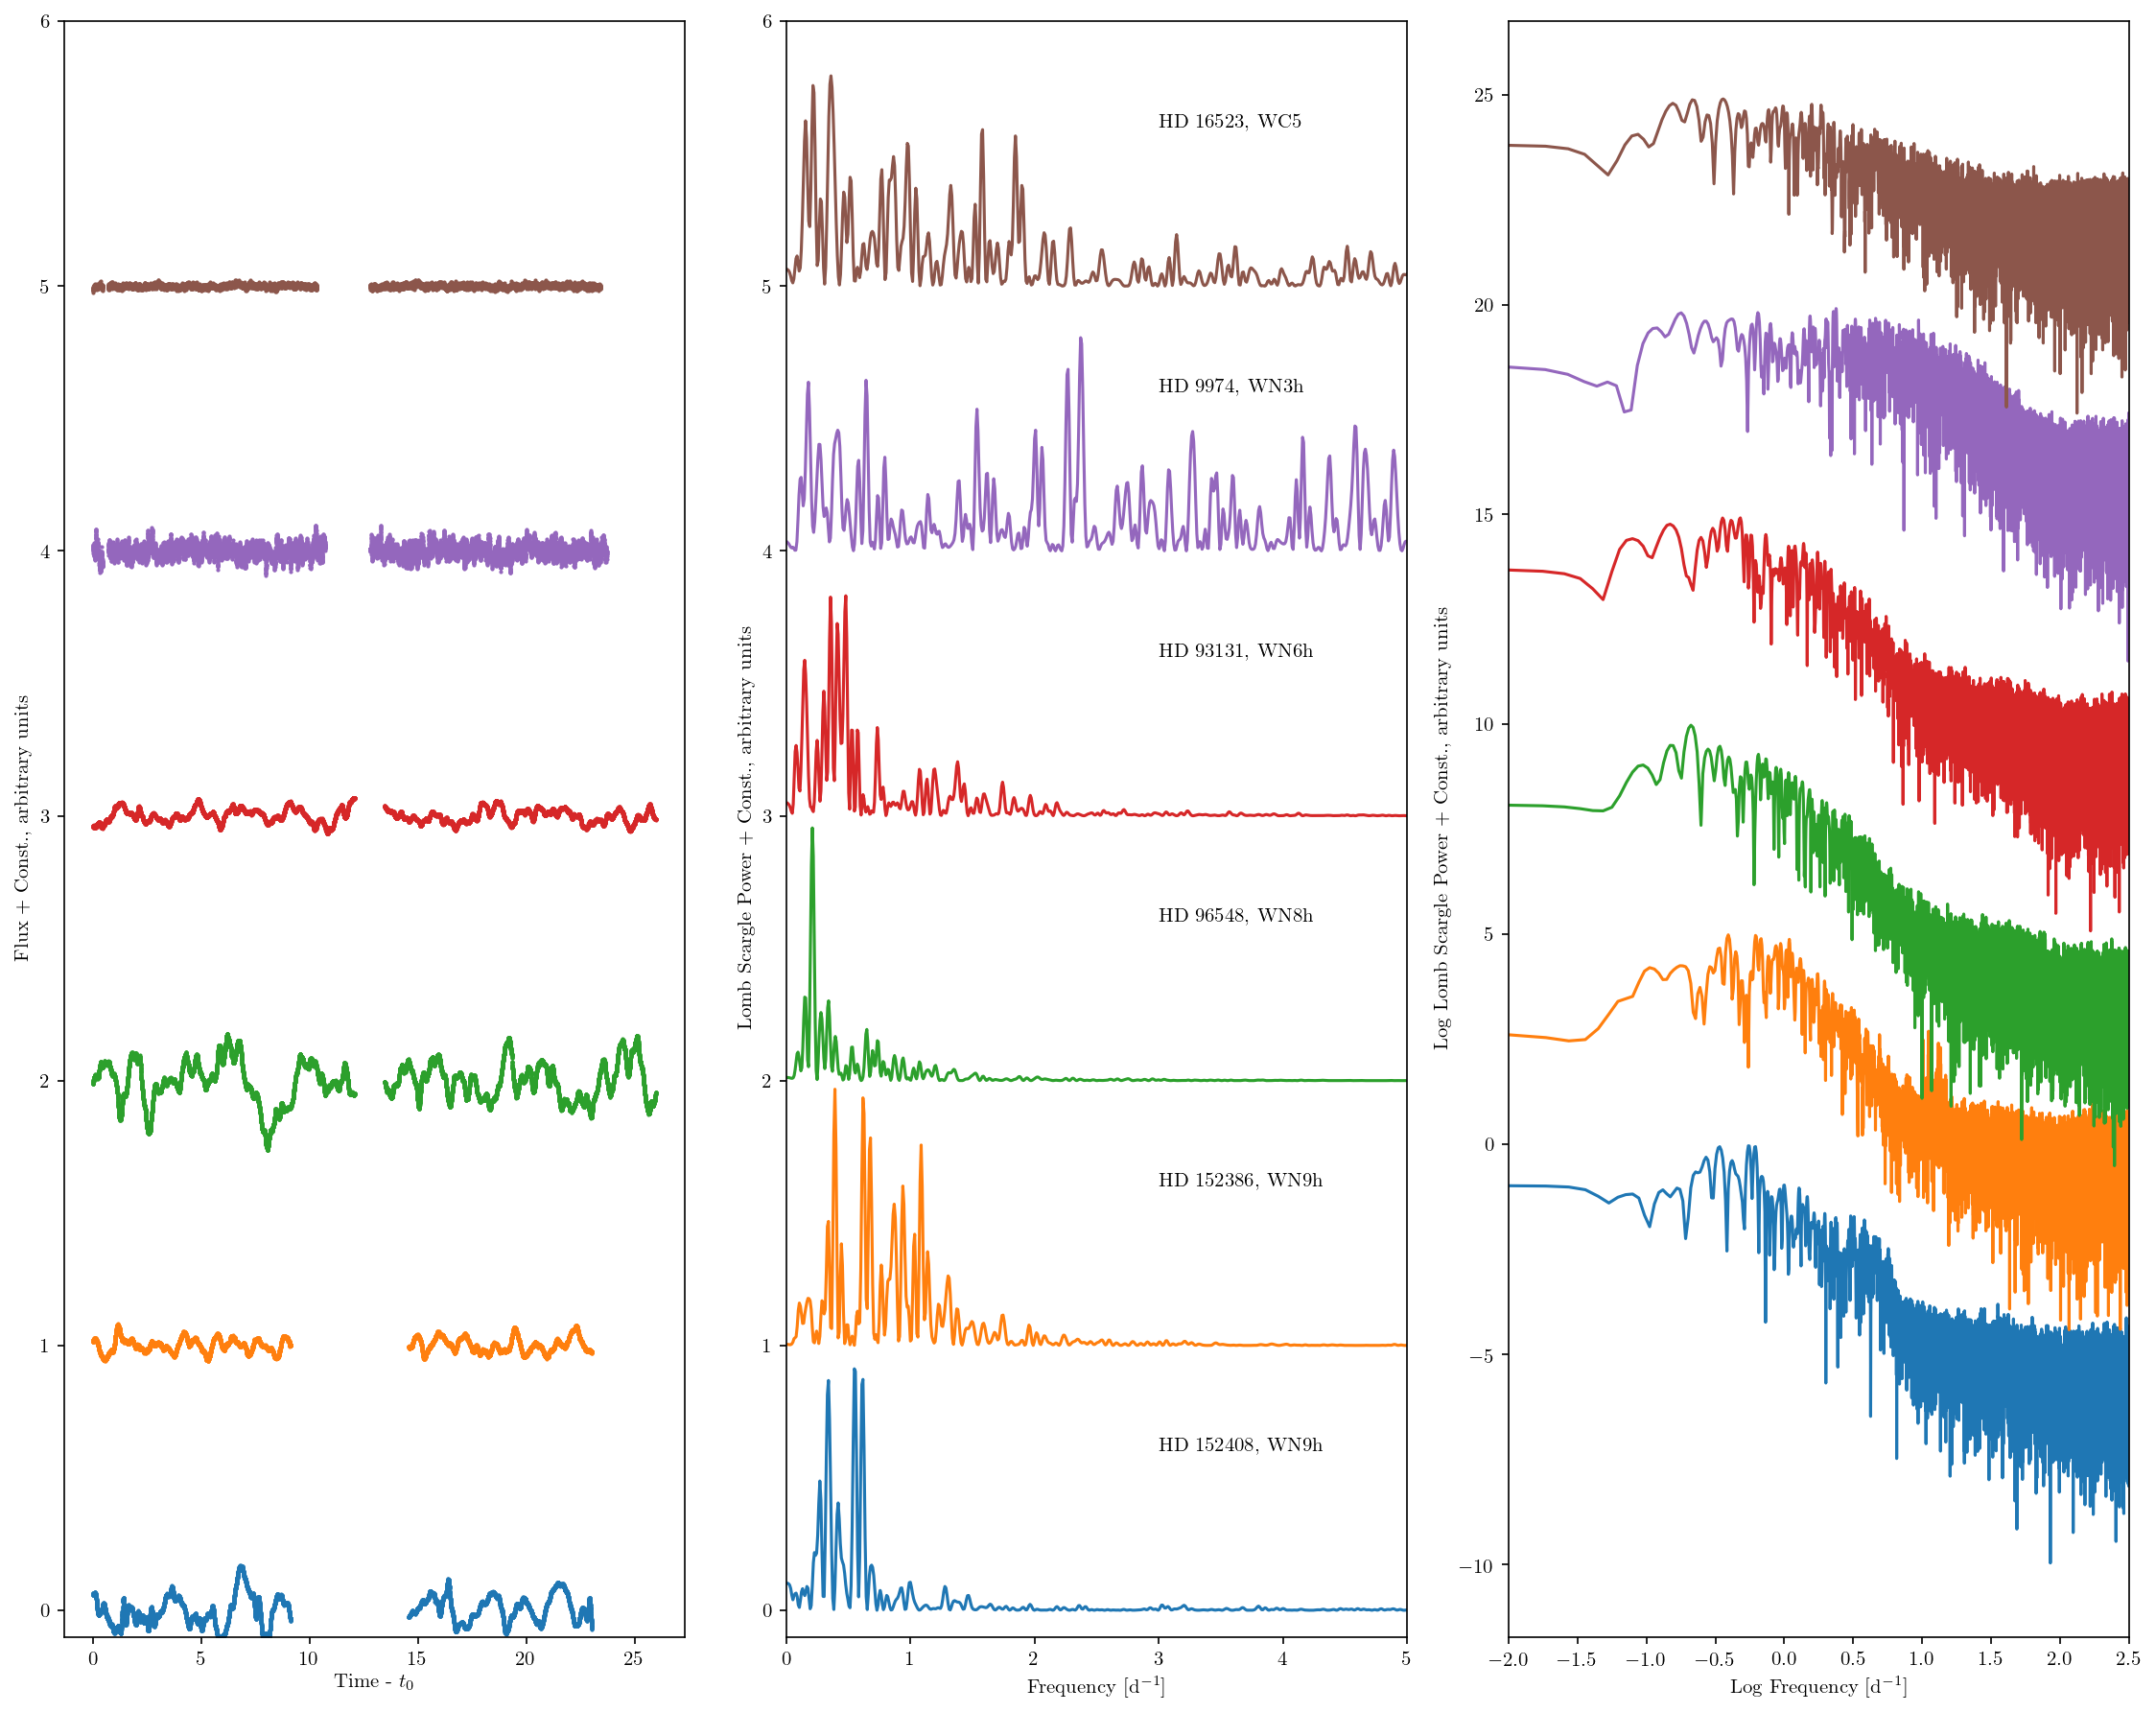

In [7]:
fig, axes = plt.subplots(ncols=3,figsize=(15,12),dpi=150)
wnhs = wrs[['h' in s for s in wrs['TrustySpT'].values]].reset_index(drop=True)
wns = wrs[[('N' in s)&('h' not in s) for s in wrs['TrustySpT'].values]].reset_index(drop=True)
wcs = wrs[['C' in s for s in wrs['TrustySpT'].values]].reset_index(drop=True)
offset = 0
from tqdm.notebook import tqdm
for df in tqdm([wnhs,wns,wcs]):
    for i in range(10,0,-1):
        this_type = df[[str(i) in s for s in df['TrustySpT'].values]]
        for j,star in this_type.iterrows():
            if ('+' not in star['SimbadSpT']) & ('50896' not in star['CommonName']): #HD 50896 = EZ CMa is a binary Schmutz & Koenigsberger 2019
                lc, lc_smooth = lc_extract(get_lc_from_id(star['TIC ID']), smooth=128)
                time, flux, err = lc['Time'], lc['Flux'], lc['Err']
                axes[0].scatter(time-time.min(),2*(2*flux - 2*flux.median() + 0.5*offset),s=1)
                ls = LombScargle(time,flux,dy=err)
                freq,power=ls.autopower(minimum_frequency=0.01)
                axes[1].plot(freq,power/power.max() + offset)
                axes[1].text(3,0.6+offset,f'{star["CommonName"]}, {star["TrustySpT"]}')
                axes[2].plot(np.log10(freq),np.log10(power/power.max())+5*offset)
                offset += 1
            
axes[1].set_ylim(-0.1,6)
axes[0].set_ylim(axes[1].get_ylim())
axes[0].set(xlabel='Time - $t_0$',ylabel='Flux + Const., arbitrary units')
axes[1].set(xlabel='Frequency [d$^{-1}$]',ylabel='Lomb Scargle Power + Const., arbitrary units',xlim=(0,5))
axes[2].set(xlabel='Log Frequency [d$^{-1}$]',ylabel='Log Lomb Scargle Power + Const., arbitrary units',xlim=(-2,2.5))
plt.tight_layout()
plt.savefig('omg_wnhs')

Ramiaramanantsoa et al. (2019) simulated WR 40, and found that wind models produced morphologically similar lightcurves, but the simulated periodograms had different peaks! Given the similarity of the periodograms in the two WN9h stars, this points to it NOT being a stochastic wind thing. That said, the lifetimes they found are of order the length of a TESS sector, so really more data would help here.

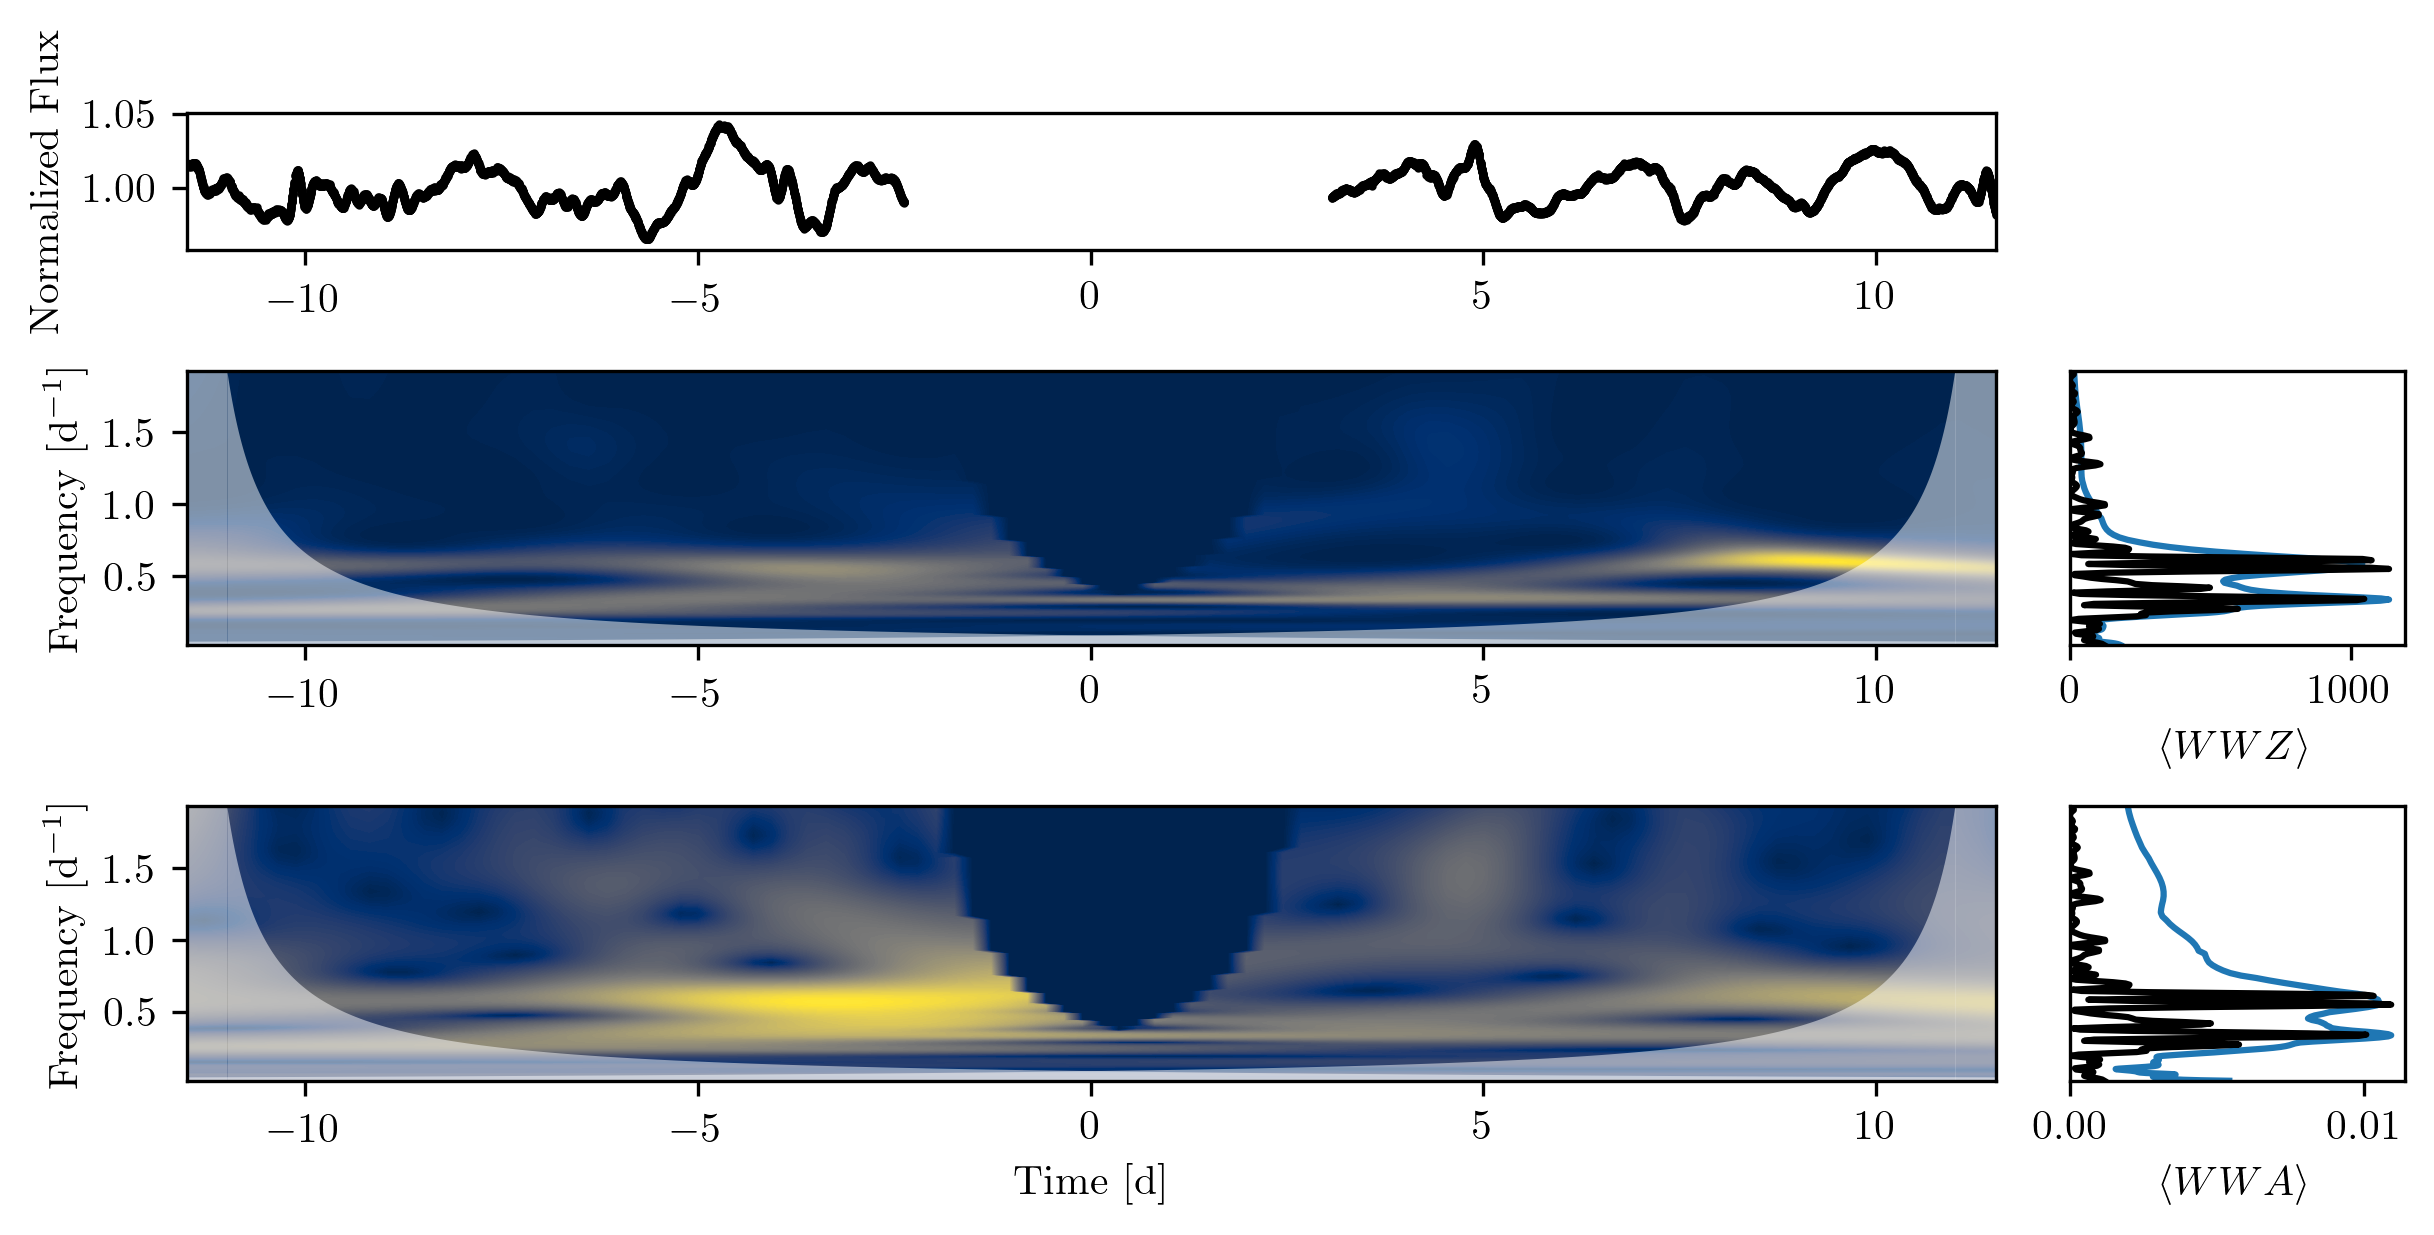

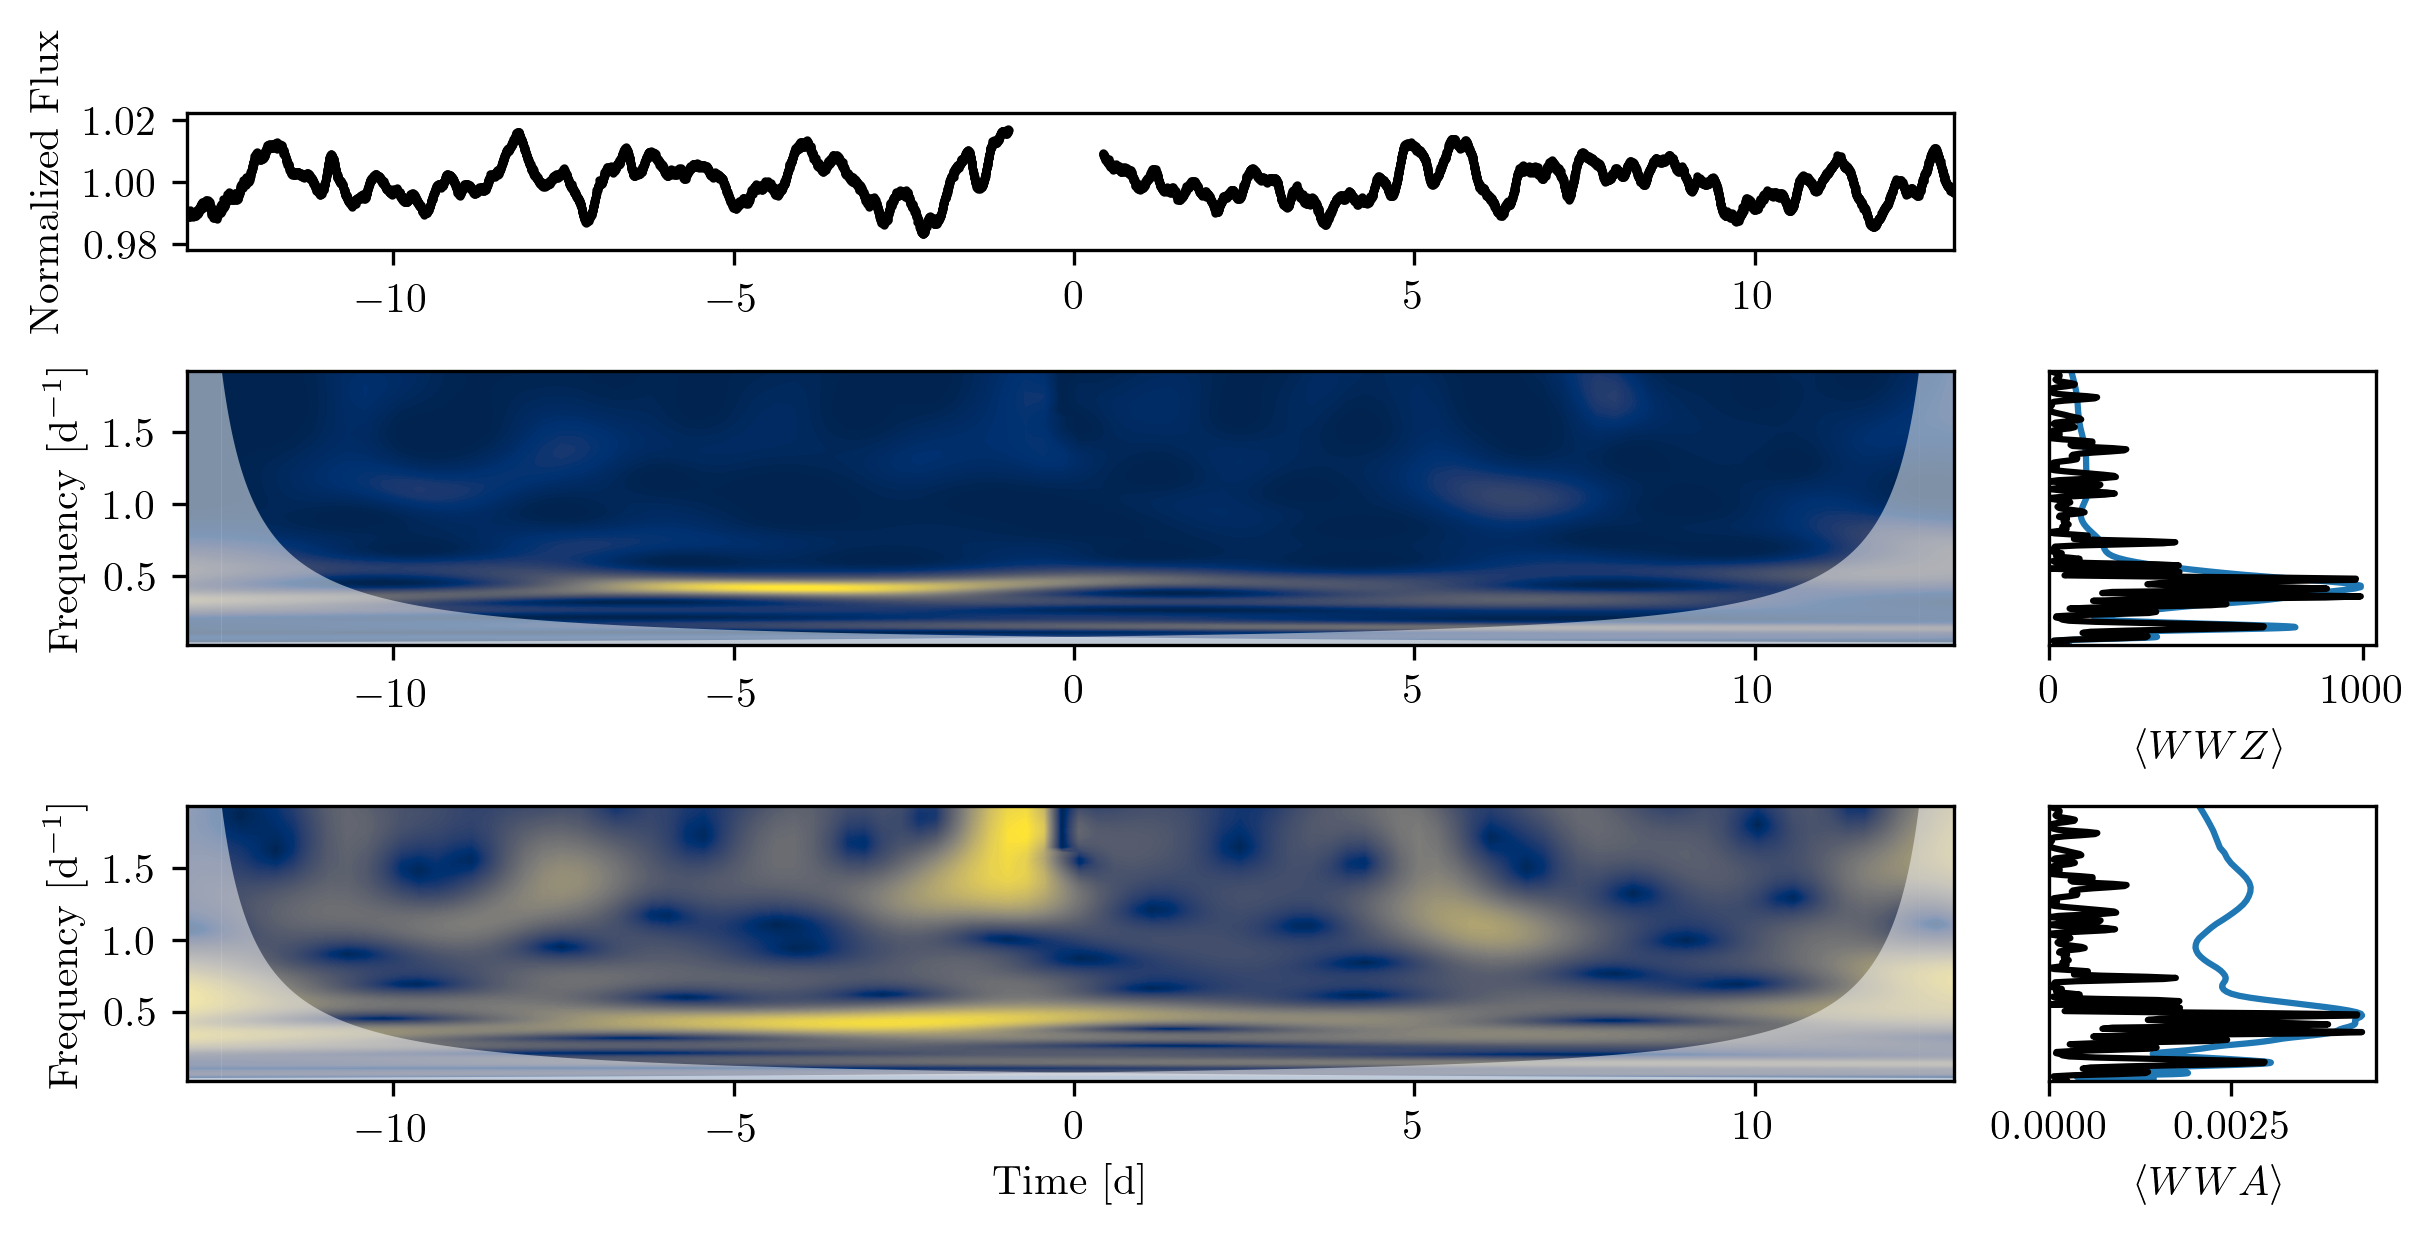

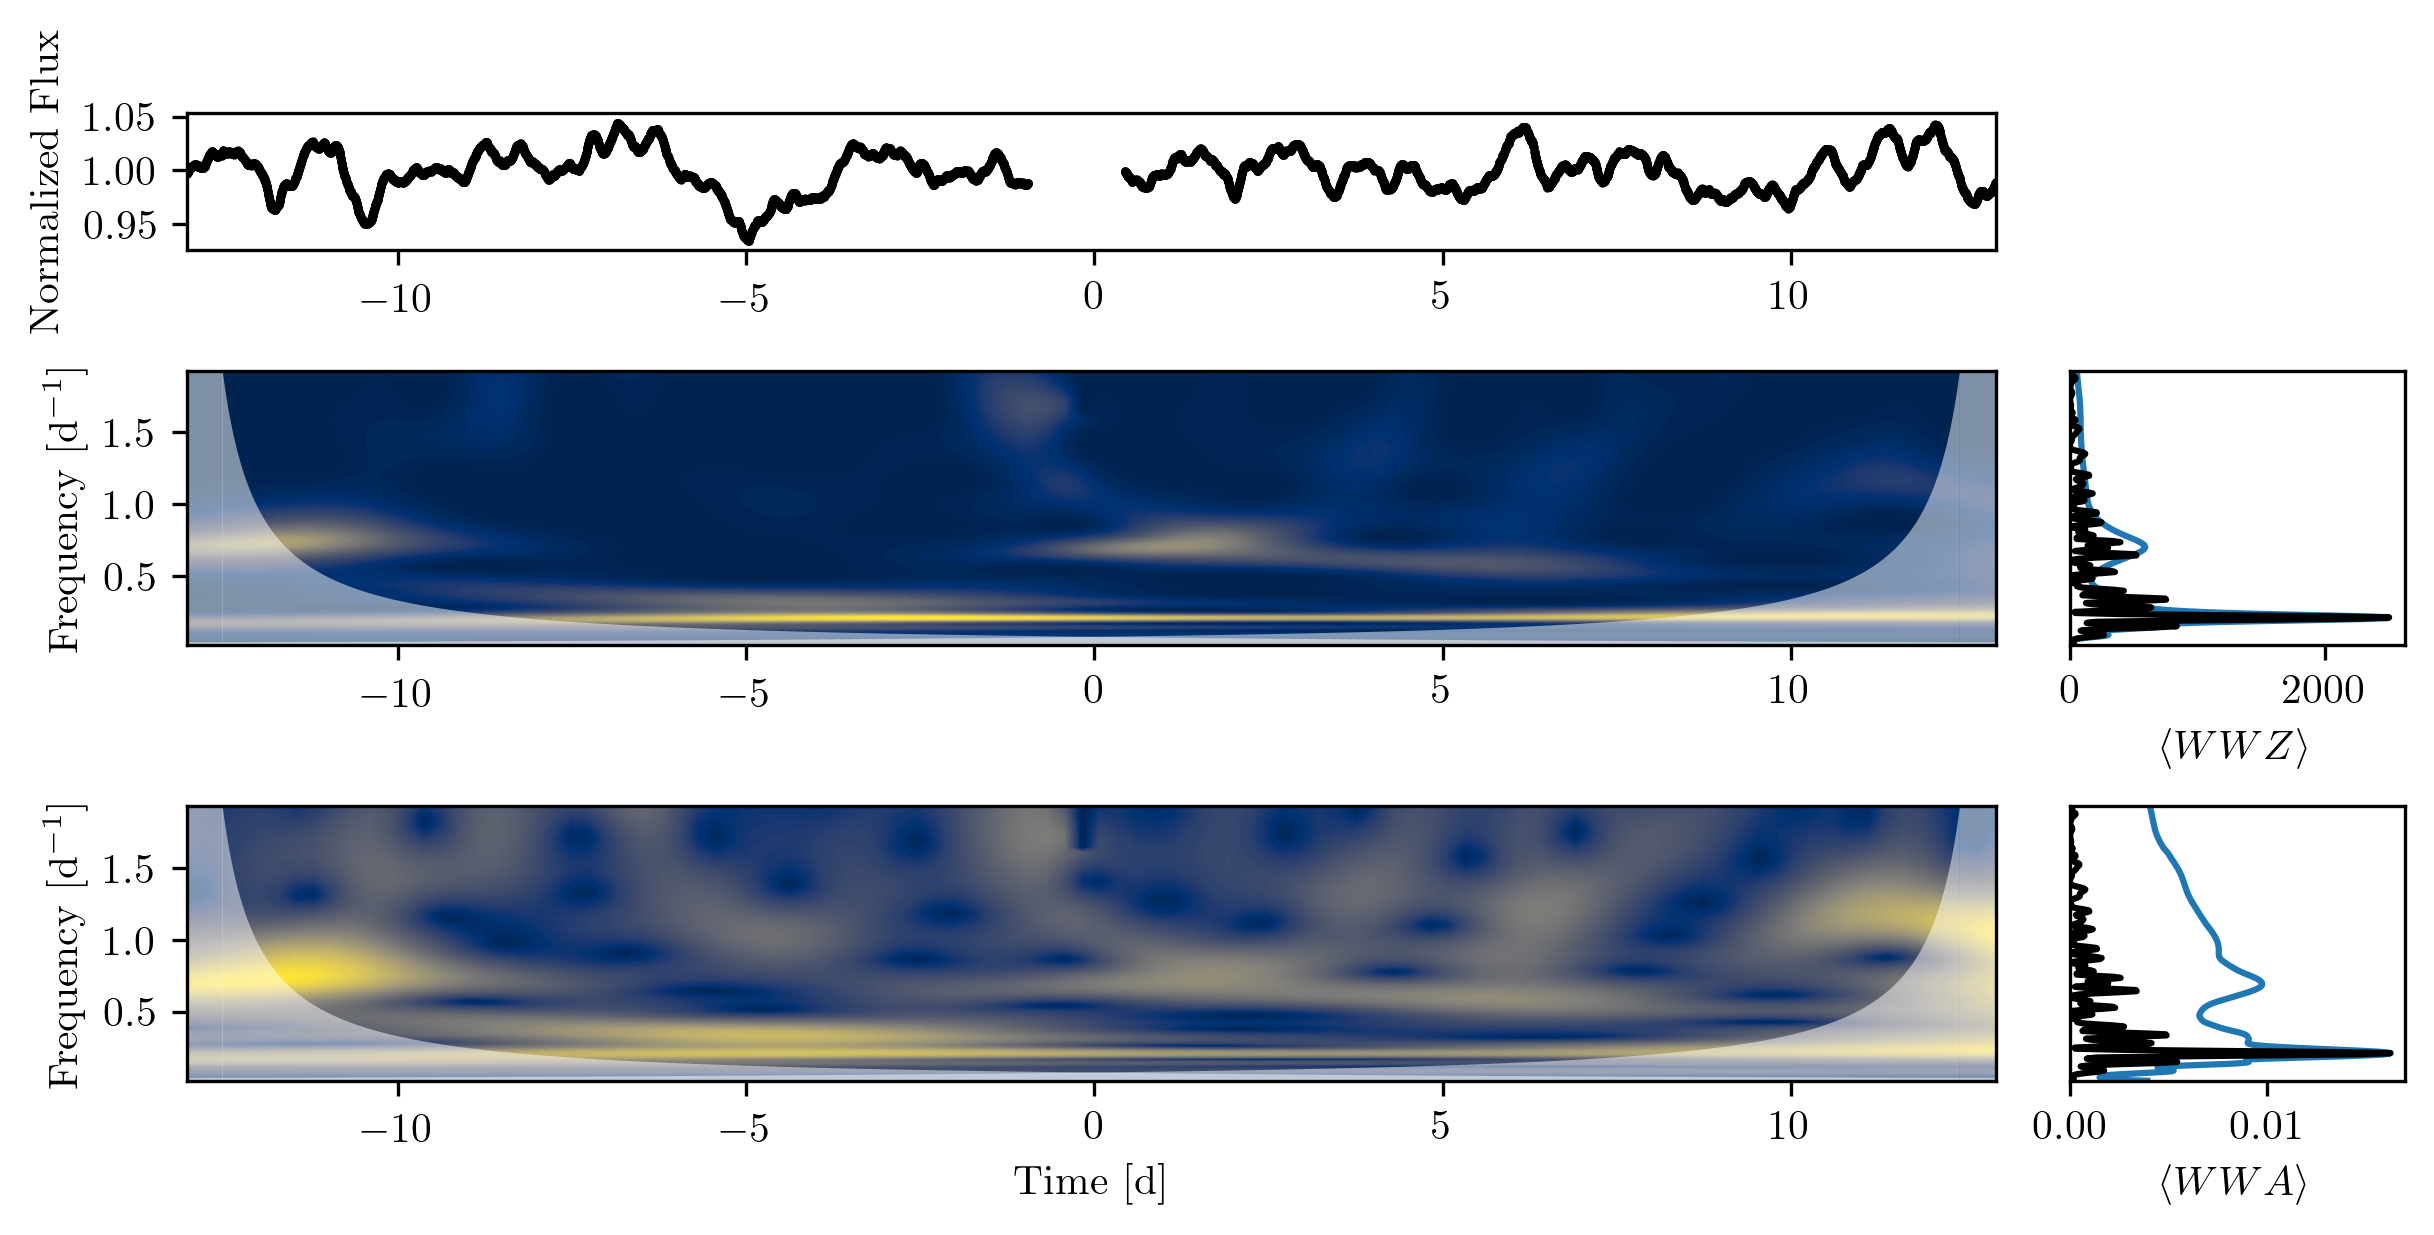

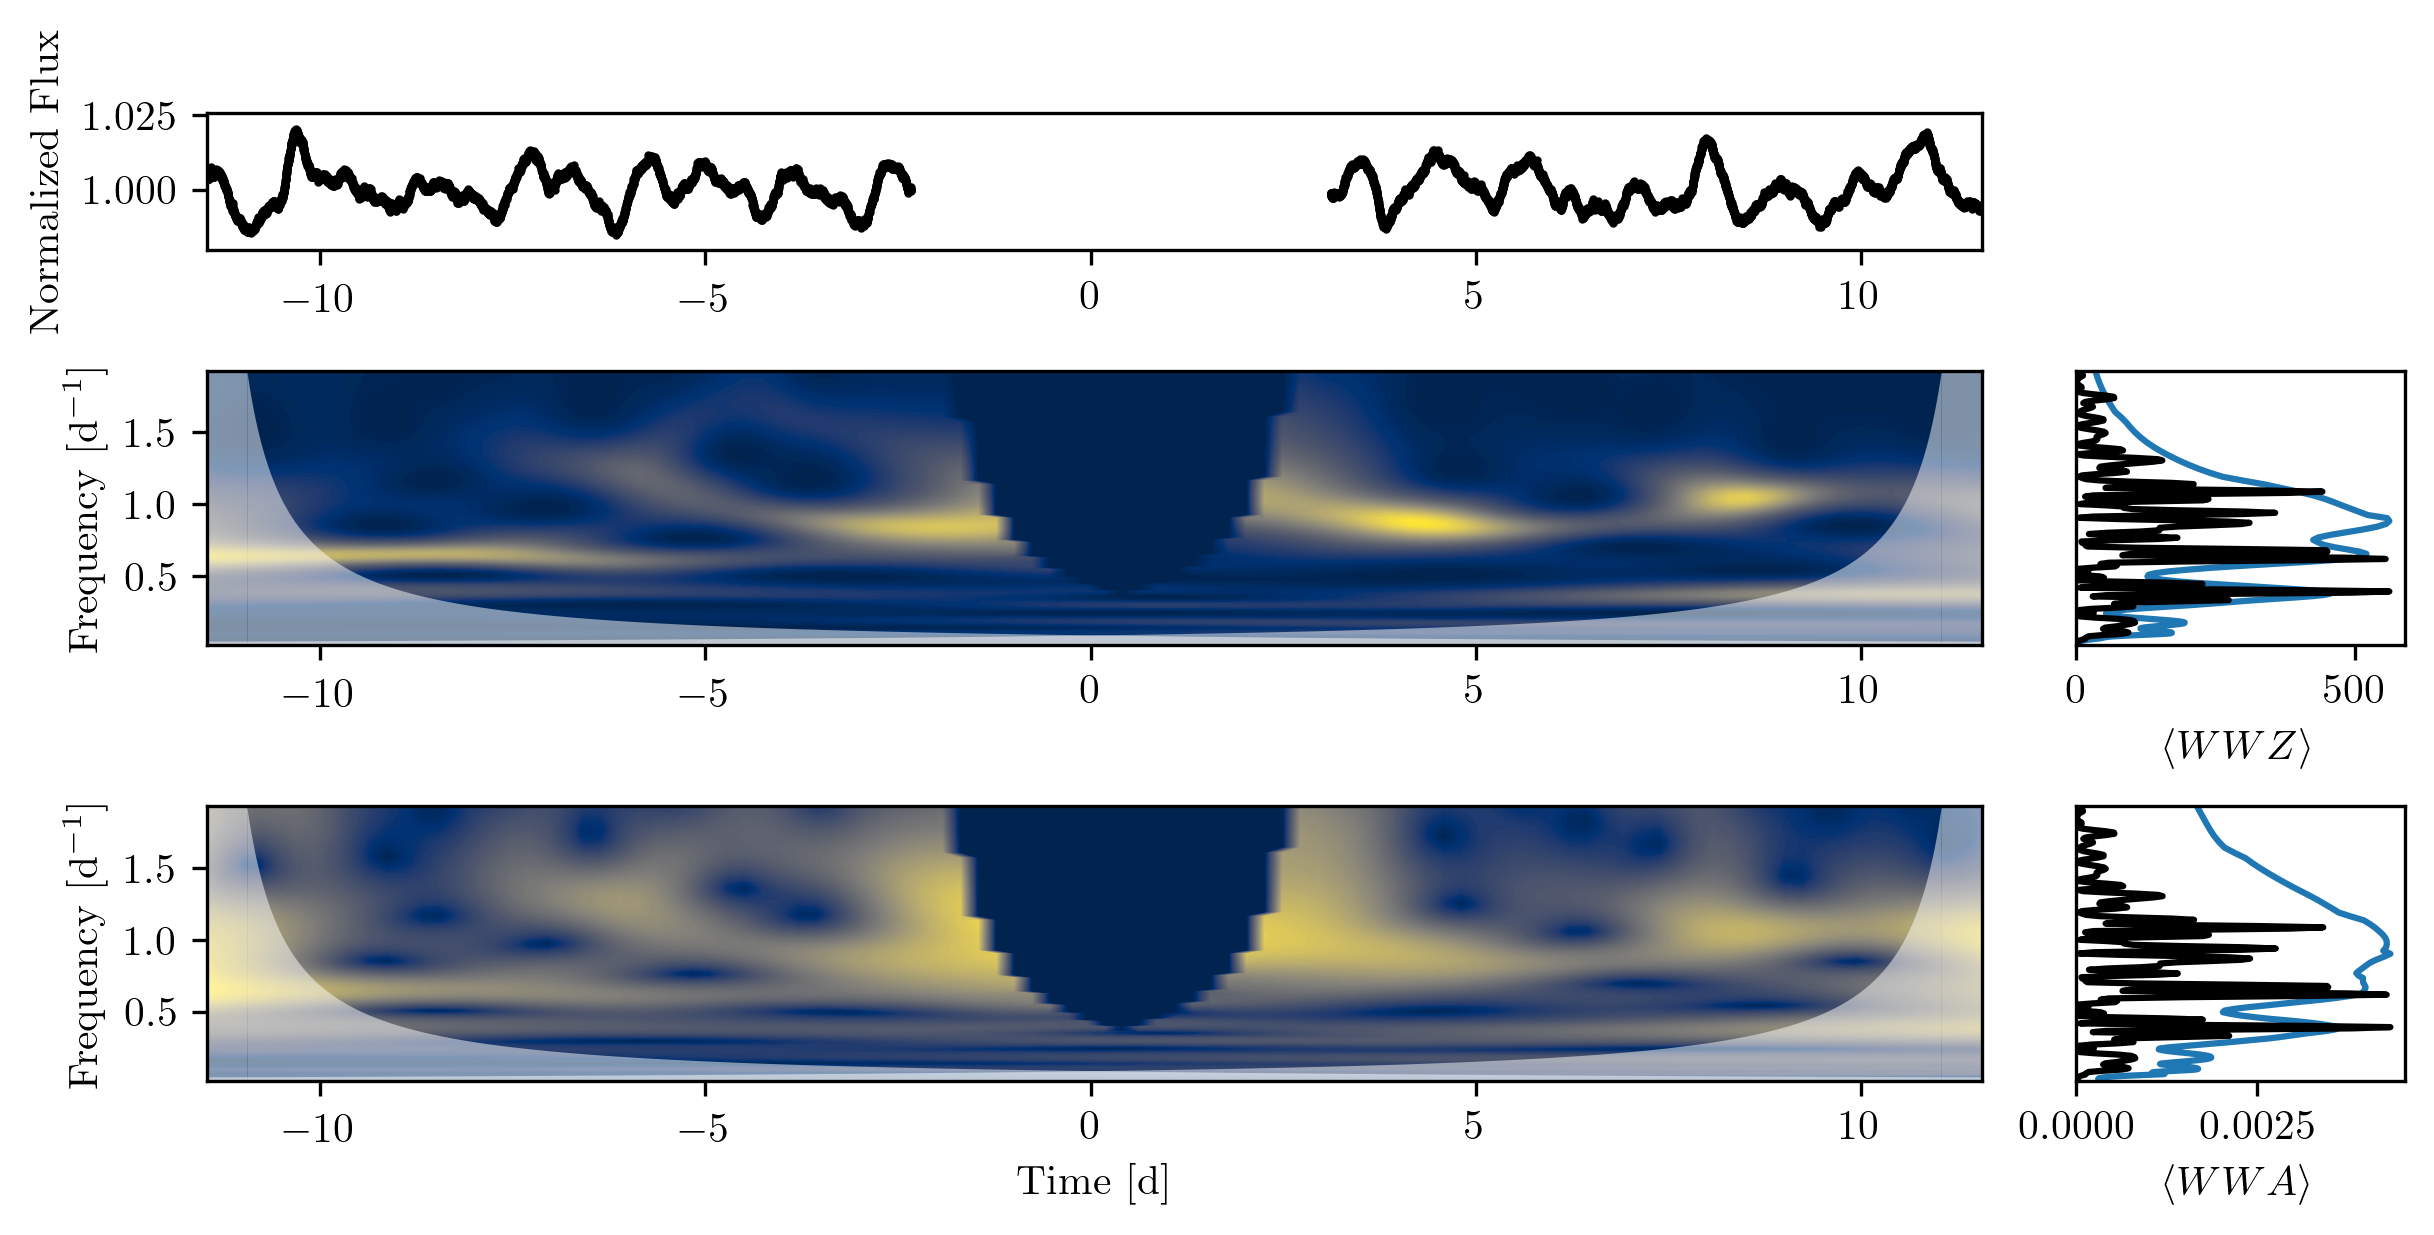

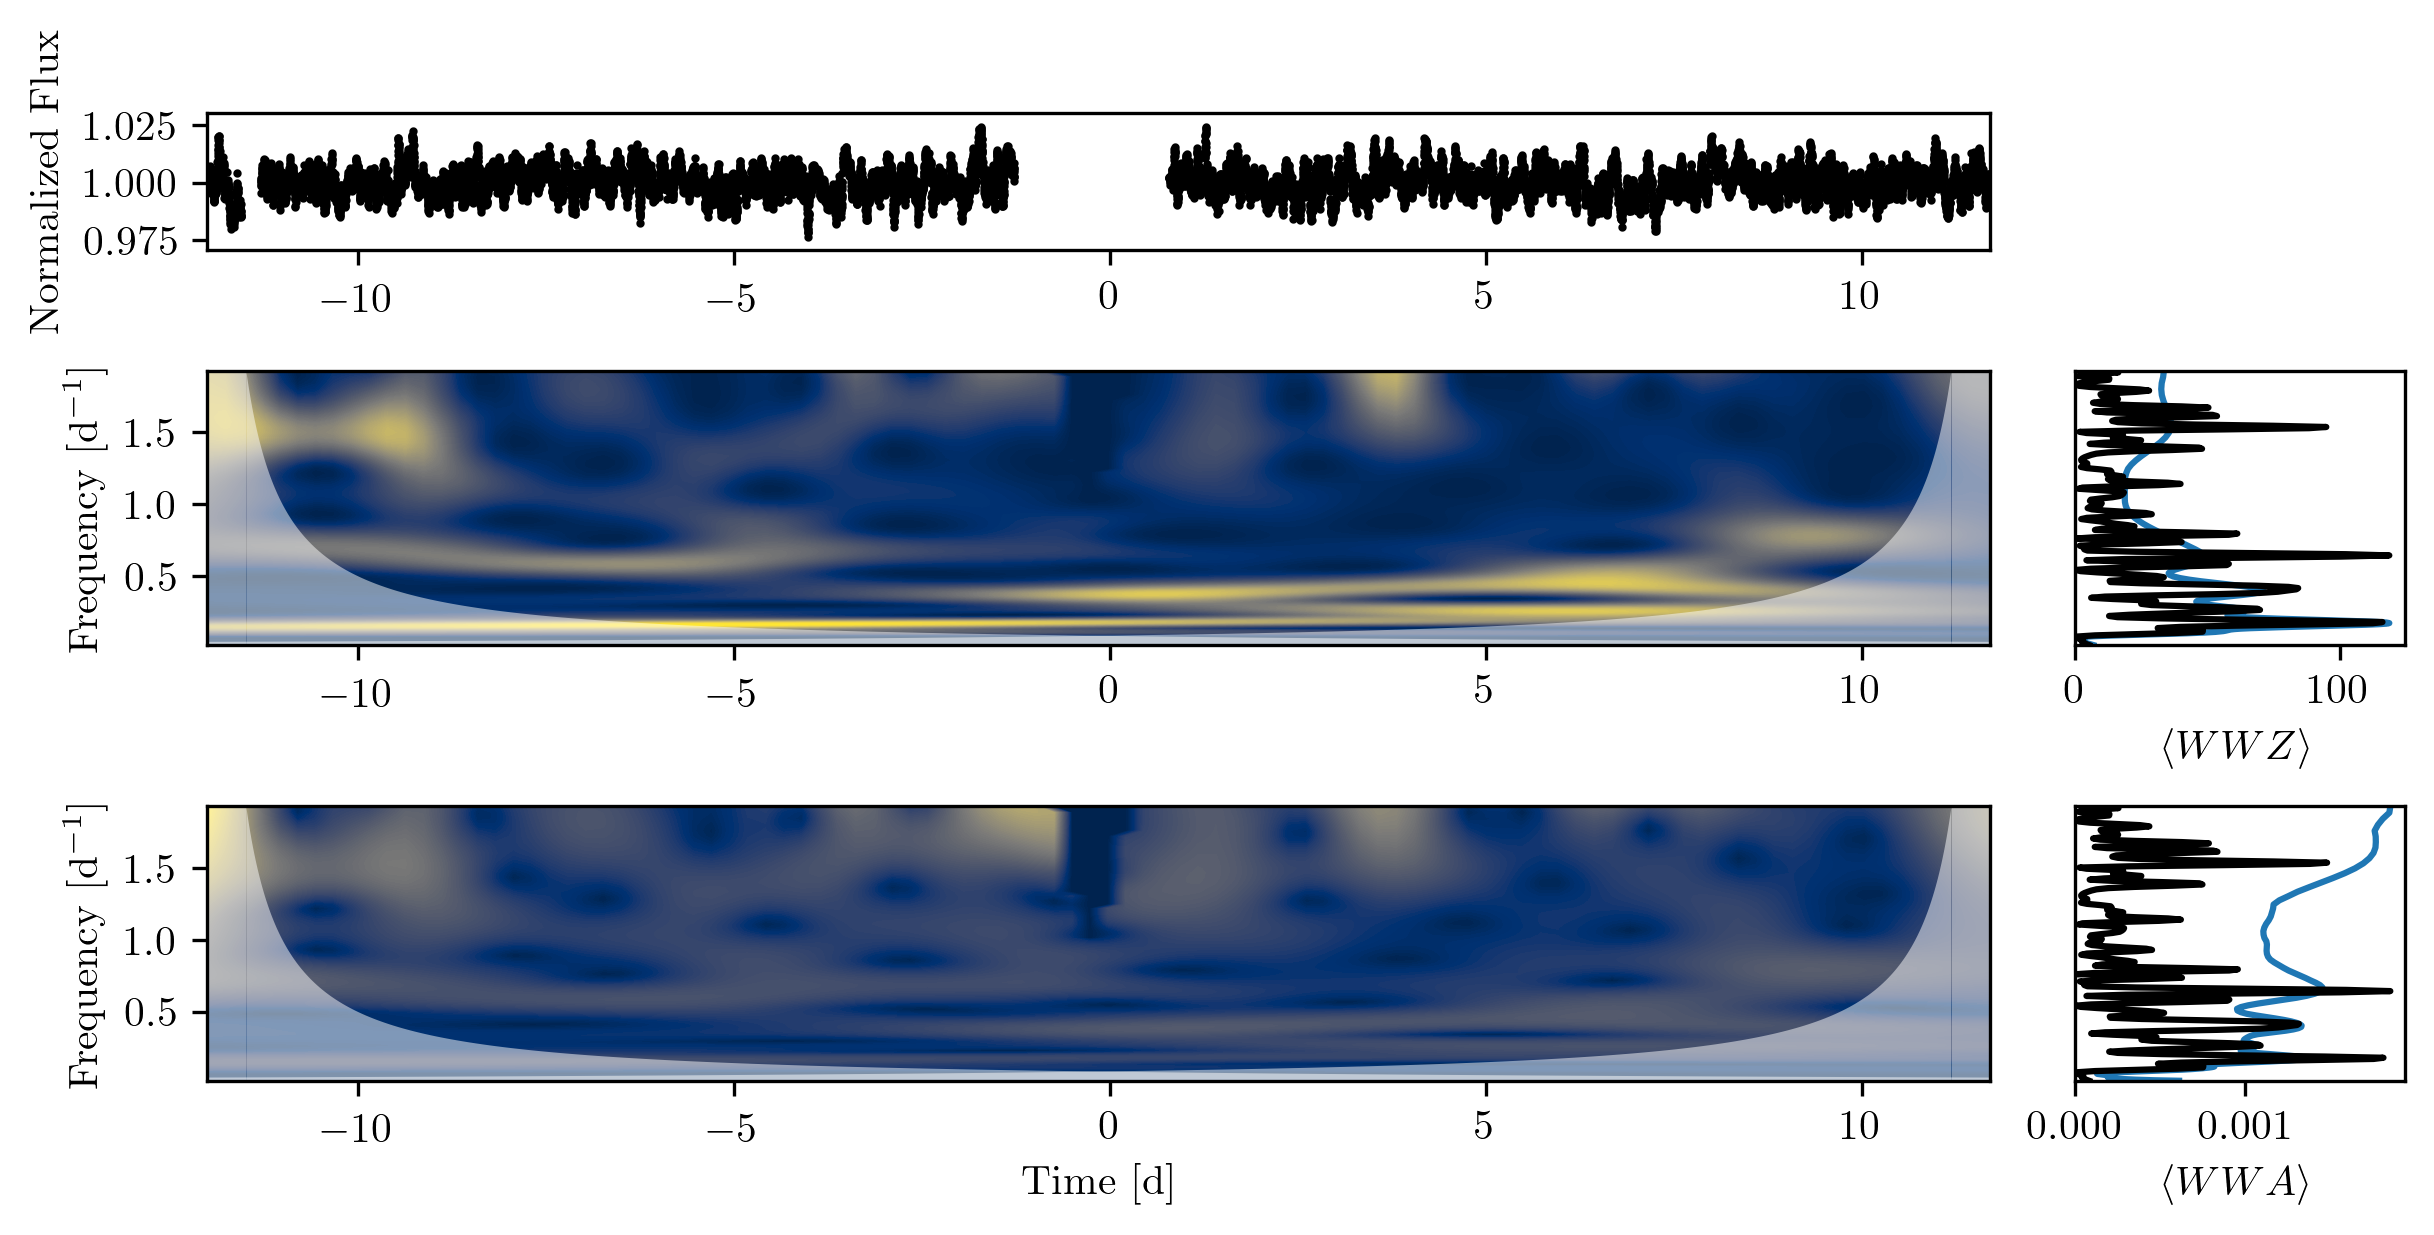

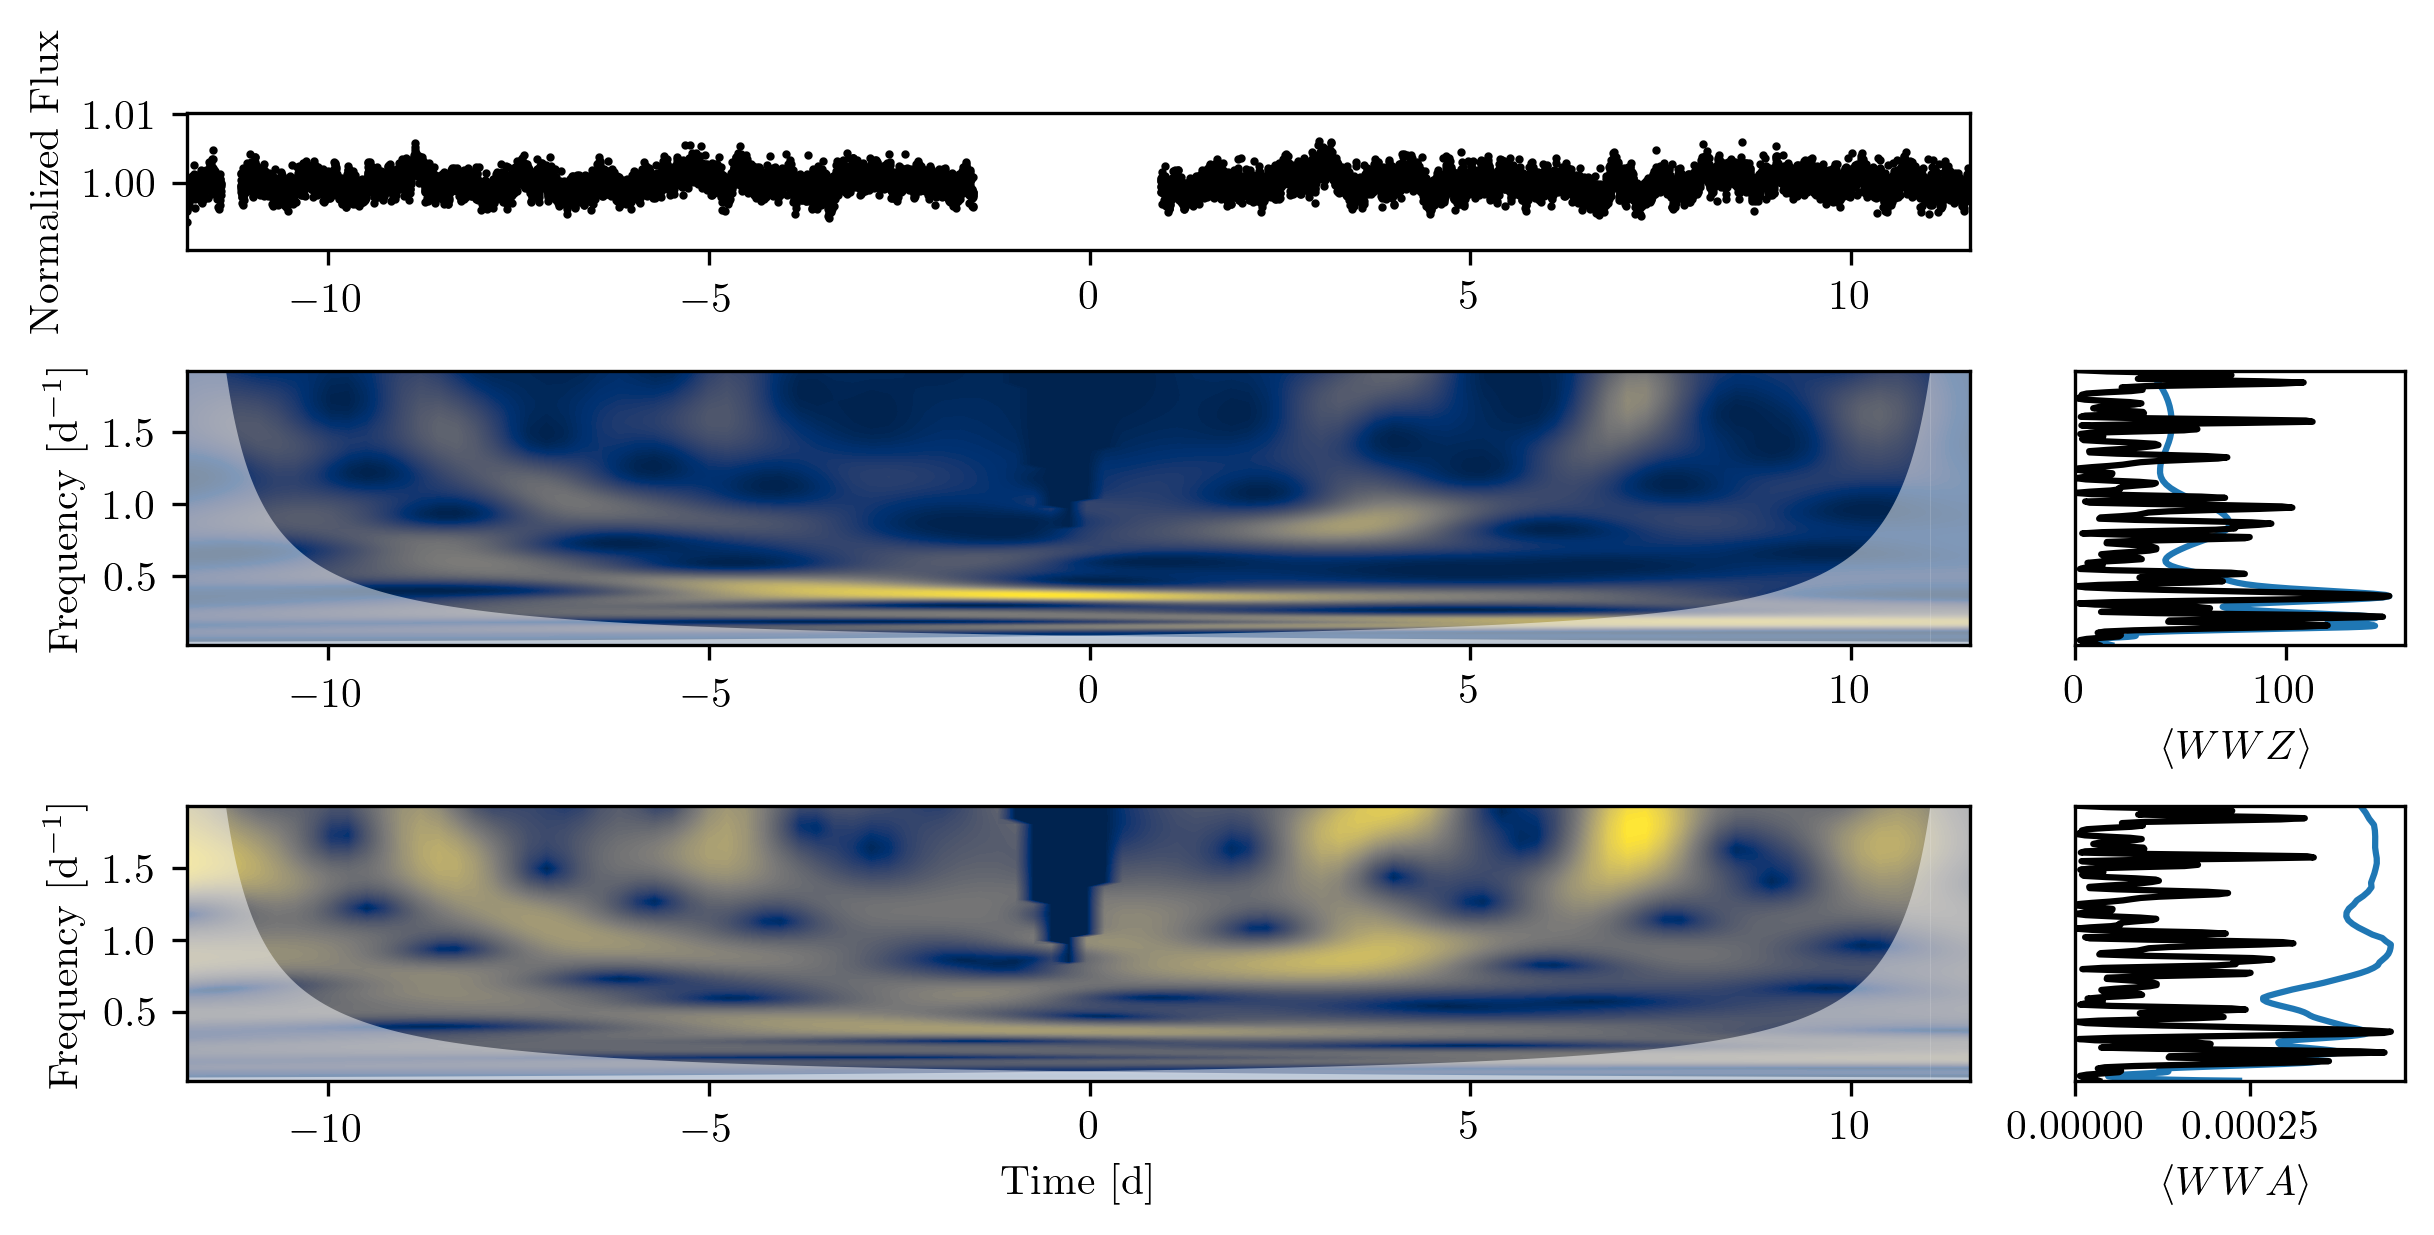

In [6]:
#Let's do a wavelet analysis!
#Let's put our functions in a list that we can loop over
func_list = [phi_1,phi_2,phi_3]
f1 = phi_1 #we're also going to need this one explicitly later
#and finally a decay constant for the Gaussian envelope
c = 0.0125
for df in tqdm([wnhs,wns,wcs]):
    for i,star in tqdm(df.iterrows(),total=len(df)):
        if ('+' not in star['SimbadSpT']) & ('50896' not in star['CommonName']): #HD 50896 = EZ CMa is a binary Schmutz & Koenigsberger 2019
            lc, lc_smooth = lc_extract(get_lc_from_id(star['TIC ID']), smooth=128)
            time, flux, err = lc['Time'], lc['Flux'], lc['Err']
            y = flux.values
            t = time.values - np.mean(time.values)
            omega_start = -3 #nu ~ 0.02
            omega_end = 3.6 #nu ~ 1.8
            omegas = np.logspace(omega_start,omega_end,200,base=2)
            taus = np.linspace(np.min(t),np.max(t),100)
            wwz,wwa = MP_WWZ(func_list,f1,y,t,omegas,taus,c=c)
            make_WWZ_plot(wwz,wwa,omegas,taus,t,y,lombscargle=True,dpi=300,figsize=(8,4))
            plt.savefig(star['CommonName']+'_wwz')

Looks like the lower frequency peaks are persistent throughout the sectors, whereas the WR40 lightcurve only had signals that lasted ~5 days. The higher frequency peaks that show up in the more stripped stars are indeed stochastic. However, the wavelet analysis helps point to which peaks are persistent.